In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns

In [ ]:
df = pd.read_csv("drive/MyDrive/Disciplinas/CCF425/2023-01/Aulas/Aulas Colab/Dados-CCF425-2023-01-NOVO.csv")

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   data_nascimento                          30 non-null     object 
 1   ano_entrada_curso                        30 non-null     int64  
 2   sexo                                     30 non-null     object 
 3   altura_cm                                30 non-null     int64  
 4   time                                     30 non-null     object 
 5   cidade_nascimento                        30 non-null     object 
 6   nota_enem                                30 non-null     float64
 7   perspectiva_futura                       30 non-null     object 
 8   Qual a sua área da computação favorita?  27 non-null     object 
 9   esporte_favorito                         30 non-null     object 
 10  participa_minascoders                    30 non-null

# Transformar categorias em numérico

In [ ]:
df['sexo'] = df['sexo'].apply(lambda x: 1 if x == 'Feminino' else 0)

In [ ]:
df['participa_minascoders'] = df['participa_minascoders'].apply(lambda x: 1 if x == 'Sim' else 0)

In [ ]:
df['cidade_nascimento'] = df["cidade_nascimento"].astype('category')
df['cidade_nascimento'] = df['cidade_nascimento'].cat.codes

In [ ]:
df = pd.get_dummies(df, columns=["time"])

In [ ]:
df['meio_transporte_frequente'] = df["meio_transporte_frequente"].astype('category')
df['meio_transporte_frequente'] = df['meio_transporte_frequente'].cat.codes

In [ ]:
df.head()

,data_nascimento,ano_entrada_curso,sexo,altura_cm,cidade_nascimento,nota_enem,perspectiva_futura,Qual a sua área da computação favorita?,esporte_favorito,participa_minascoders,cra_atual,creditos_atual,meio_transporte_frequente,estilo_musical,idade,time_Cruzeiro Série B,time_Flamengo,time_Galo Doido Série A,time_Nenhum,time_Vasco,time_internacional
0,2001-06-27,2019,0,180,13,663.0,Focar na parte gráfica.,Computação Gráfica,Basquete,0,65.6,26,0,Pop,21,0,0,0,1,0,0
1,2001-09-06,2021,1,154,10,666.8,"são boas perspectivas, estou tendo uma formação excelente e tenho noção da área que quero me profissionalizar.",Aprendizado de Máquina,Basquete,1,73.0,28,4,rock,21,1,0,0,0,0,0
2,2001-09-07,2021,1,174,1,702.0,ganhar dinheiro,não tenho ainda,Futebol,1,80.9,30,3,pop,21,1,0,0,0,0,0
3,2002-11-13,2021,0,175,7,715.0,bem ruim,Segurança,Basquete,0,78.0,28,3,trap,20,0,0,0,1,0,0
4,2001-07-25,2021,0,175,10,720.0,"Conseguir um emprego bom, na área de dados e IA e que possa ganhar uma boa grana",Data Science,Futebol,0,77.9,28,3,Rock,21,0,0,1,0,0,0


In [ ]:
df.columns

Index(['data_nascimento', 'ano_entrada_curso', 'sexo', 'altura_cm', 'cidade_nascimento', 'nota_enem', 'perspectiva_futura', 'Qual a sua área da computação favorita?', 'esporte_favorito', 'participa_minascoders', 'cra_atual', 'creditos_atual', 'meio_transporte_frequente', 'estilo_musical', 'idade', 'time_Cruzeiro Série B', 'time_Flamengo', 'time_Galo Doido Série A', 'time_Nenhum', 'time_Vasco', 'time_internacional'], dtype='object')

# Analiser similaridades

In [ ]:
cols_interesse = ['ano_entrada_curso','sexo','altura_cm','cidade_nascimento','participa_minascoders',
                  'nota_enem','meio_transporte_frequente','idade']

In [ ]:
from scipy.spatial.distance import pdist,squareform

In [ ]:
df[cols_interesse]

,ano_entrada_curso,sexo,altura_cm,cidade_nascimento,participa_minascoders,nota_enem,meio_transporte_frequente,idade
0,2019,0,180,13,0,663.00,0,21
1,2021,1,154,10,1,666.80,4,21
2,2021,1,174,1,1,702.00,3,21
3,2021,0,175,7,0,715.00,3,20
4,2021,0,175,10,0,720.00,3,21
5,2021,0,172,1,1,610.00,0,24
6,2019,1,165,1,1,630.00,1,21
7,2022,0,180,1,1,653.00,2,24
8,2021,1,175,10,1,738.92,1,20
9,2017,0,174,1,0,640.00,1,25


In [ ]:
# calcula a distância entre instâncias (no caso, alunos)
pdist(df.loc[[1, 2]][cols_interesse],'euclidean')

array([41.48541913])

In [ ]:
pdist(df.loc[[1, 2, 3]][cols_interesse], 'euclidean')

array([41.48541913, 52.69952561, 14.45683229])

In [ ]:
squareform(pdist(df.loc[[1, 2, 3]][cols_interesse], 'euclidean'))

array([[ 0.        , 41.48541913, 52.69952561],
       [41.48541913,  0.        , 14.45683229],
       [52.69952561, 14.45683229,  0.        ]])

In [ ]:
pairwise = pd.DataFrame(
    squareform(pdist(df[cols_interesse],'euclidean')),
    columns = df.index,
    index = df.index
)

pairwise

# 0, 1, 7, 19, 29
# 1, 20, 26, 28, 29
# 2, 3, 10, 11, 12, 13, 14, 15, 16, 22, 27
# 3, 4, 15, 23

# kmeans
# 0 1 5 6 7 9 18 19 20 21 26 28 29

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.000000,26.859635,41.424630,52.716221,57.410800,55.054518,38.223030,16.340135,76.196105,27.018512,32.153382,33.559499,38.561639,38.845849,40.162171,49.658836,28.337255,97.565363,65.015383,21.072788,30.232433,21.886069,44.866469,68.264193,73.171033,56.231664,32.726136,39.281039,21.307276,17.606817
1,26.859635,0.000000,41.485419,52.699526,57.220975,60.475119,39.613634,31.023217,75.181742,35.245425,26.381812,37.085846,37.138121,29.618238,45.392070,47.208474,35.401130,96.349572,69.305411,20.848751,9.243376,37.646248,42.605633,71.348721,66.083583,51.585269,16.100932,43.419351,14.907716,11.757551
2,41.424630,41.485419,0.000000,14.456832,20.199010,92.124915,72.615425,49.487372,38.080000,62.305698,18.369540,12.515590,9.848858,16.093477,14.933185,11.135529,14.317821,58.215118,102.093095,25.121752,39.974992,57.818682,6.082763,32.954514,33.615473,19.544820,29.103264,6.708204,33.882149,34.000000
3,52.716221,52.699526,14.456832,0.000000,5.916080,105.337553,85.860352,62.641839,24.231517,75.544689,27.085790,19.810098,16.248077,25.337719,15.165751,6.557439,25.690465,45.343136,115.264912,38.363816,52.258971,70.809604,13.038405,19.570386,24.228083,10.816654,40.792156,17.378147,47.000000,46.141088
4,57.410800,57.220975,20.199010,5.916080,0.000000,110.494344,91.054928,67.874885,19.104094,80.734132,31.378974,24.195867,20.904545,29.883106,18.520259,11.045361,30.967725,40.779897,120.445008,43.744513,57.201399,76.032888,18.466185,15.033296,22.090722,10.954451,45.661800,22.956481,52.191953,51.048996
5,55.054518,60.475119,92.124915,105.337553,110.494344,0.000000,21.540659,43.794977,129.338186,30.380915,81.875760,86.904775,90.476516,85.965109,94.477511,101.237345,80.659779,150.133274,11.401754,67.609041,61.245408,36.769553,95.110462,122.274282,122.764001,107.605762,72.221880,90.443352,60.621778,60.967204
6,38.223030,39.613634,72.615425,85.860352,91.054928,21.540659,0.000000,27.820855,109.770517,14.247807,61.657441,67.900221,70.668239,65.268675,75.907839,81.369527,62.048368,130.583307,30.594117,47.730309,39.962482,23.537205,75.219678,103.580886,102.200783,87.412814,51.048996,71.624018,40.112342,40.681691
7,16.340135,31.023217,49.487372,62.641839,67.874885,43.794977,27.820855,0.000000,86.644367,15.264338,42.459863,44.690491,48.969378,46.776062,51.884487,59.169249,37.576588,107.144762,54.110997,26.785489,31.192948,9.273618,53.160135,79.025312,81.859636,66.385239,37.094474,47.159304,23.811762,24.020824
8,76.196105,75.181742,38.080000,24.231517,19.104094,129.338186,109.770517,86.644367,0.000000,99.549819,49.422003,42.930157,39.303516,46.818441,36.732090,28.766759,49.448624,22.413532,139.322527,62.414421,74.824103,94.731021,35.490371,13.218411,19.618522,24.176154,62.909192,40.555720,70.519263,69.720631
9,27.018512,35.245425,62.305698,75.544689,80.734132,30.380915,14.247807,15.264338,99.549819,0.000000,52.977731,57.196503,60.950800,57.070132,65.000000,71.540198,51.039201,120.162390,40.755368,38.115383,35.665109,11.180340,65.444633,92.477024,93.445171,78.204859,44.732538,60.522723,31.717503,32.557641


<Axes: >

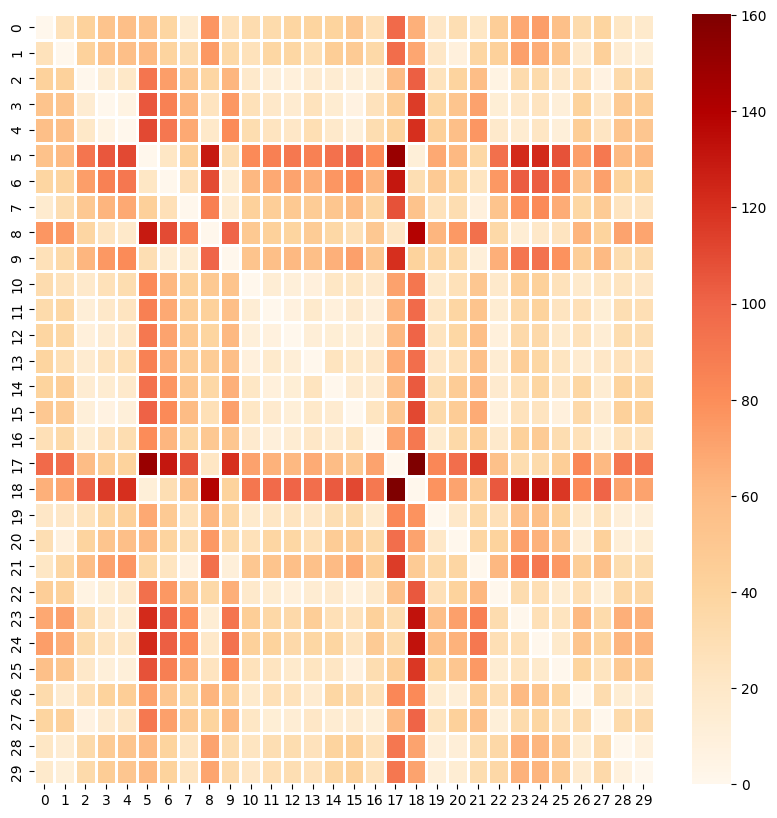

In [ ]:

# make pairwise distance matrix
pairwise_top = pd.DataFrame(
    squareform(pdist(df[cols_interesse],'euclidean')),
    columns = df.index,
    index = df.index
)

# plot it with seaborn
plt.figure(figsize=(10,10))
sns.heatmap(
    pairwise_top,
    cmap='OrRd',
    linewidth=1
)

# Agrupamento por k-means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2).fit(df[cols_interesse])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.labels_
# 0 1 5 6 7 9 18 19 20 21 26 28 29


#array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1],
#array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0],
#array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0],

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[2.01992308e+03, 3.07692308e-01, 1.68076923e+02, 3.23076923e+00,
        5.38461538e-01, 6.51778462e+02, 1.84615385e+00, 2.16923077e+01],
       [2.02047059e+03, 2.35294118e-01, 1.72705882e+02, 6.70588235e+00,
        2.94117647e-01, 7.12171765e+02, 1.41176471e+00, 2.05882353e+01]])

In [ ]:
def plot_cluster(model, df, attr_x, attr_y):
  plt.figure(figsize=(10,3))
  sns.scatterplot(x=df[attr_x], y=df[attr_y], hue=model.labels_, s=40)
  plt.title('Classificação K-Means')

  plt.show()

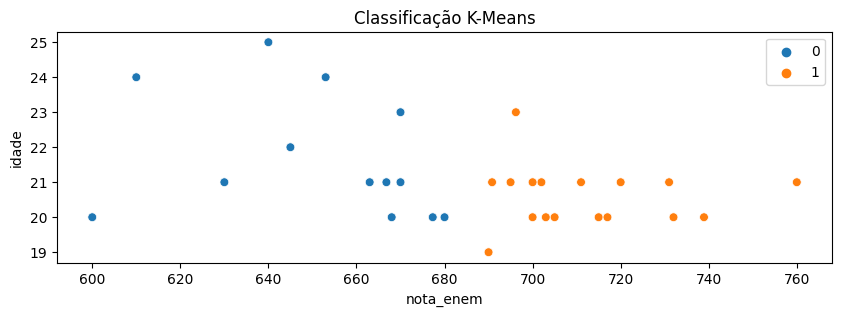

In [ ]:
plot_cluster(kmeans, df, "nota_enem","idade")

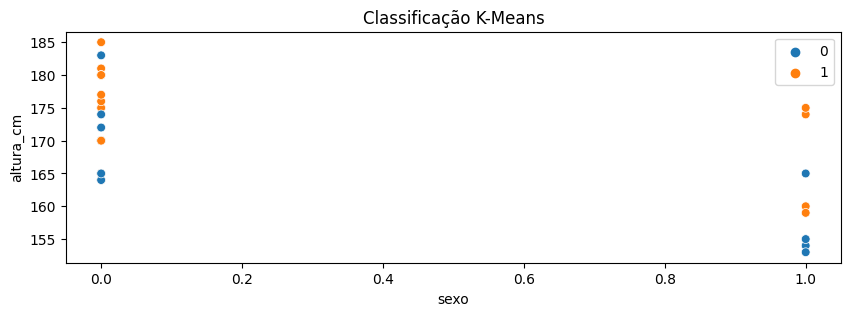

In [ ]:
plot_cluster(kmeans, df, "sexo","altura_cm")

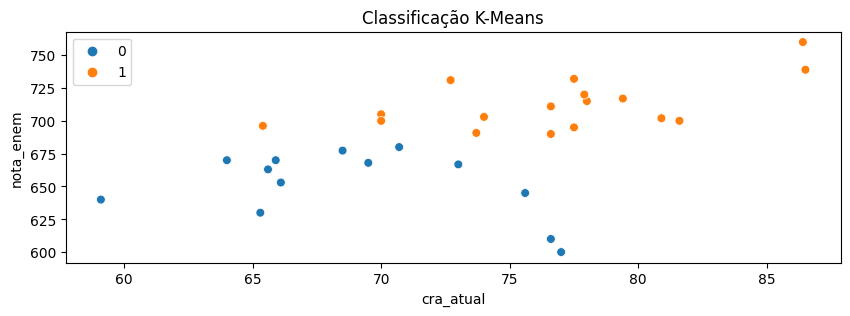

In [ ]:
plot_cluster(kmeans, df, "cra_atual","nota_enem")

In [ ]:
from sklearn import metrics

In [ ]:
print('Silhueta:', round(metrics.silhouette_score(df[cols_interesse], kmeans.labels_), 4))

Silhueta: 0.5032


In [ ]:
cols = ['ano_entrada_curso','sexo','altura_cm','participa_minascoders','nota_enem','idade']
kmeans = KMeans(n_clusters=2).fit(df[cols])
print('Silhueta:', round(metrics.silhouette_score(df[cols], kmeans.labels_), 4))

Silhueta: 0.5179


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cols = ['ano_entrada_curso','participa_minascoders','nota_enem','idade']
kmeans = KMeans(n_clusters=2).fit(df[cols])
print('Silhueta:', round(metrics.silhouette_score(df[cols], kmeans.labels_), 4))

Silhueta: 0.5674


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cols = ['nota_enem','ano_entrada_curso']
kmeans = KMeans(n_clusters=2).fit(df[cols])
print('Silhueta:', round(metrics.silhouette_score(df[cols], kmeans.labels_), 4))

Silhueta: 0.5699


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cols = ['sexo','nota_enem']
kmeans = KMeans(n_clusters=2).fit(df[cols])
print('Silhueta:', round(metrics.silhouette_score(df[cols], kmeans.labels_), 4))

Silhueta: 0.5712


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


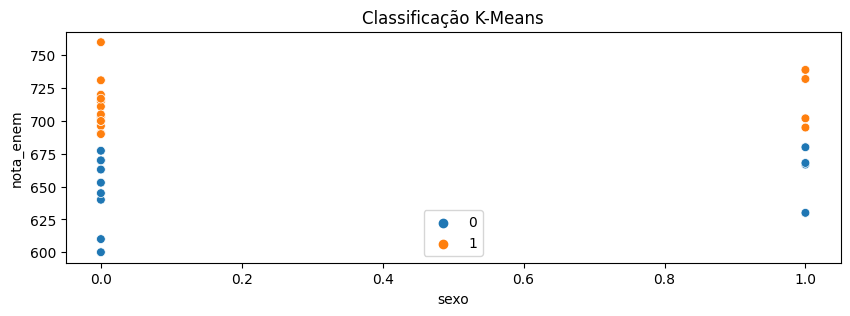

In [ ]:
plot_cluster(kmeans, df, "sexo","nota_enem")

In [ ]:
kmeans.labels_

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0], dtype=int32)

In [ ]:
df.loc[(kmeans.labels_ == 0)][['sexo','nota_enem']]

,sexo,nota_enem
0,0,663.00
1,1,666.80
5,0,610.00
6,1,630.00
7,0,653.00
9,0,640.00
18,0,600.00
19,0,677.32
20,1,668.00
21,0,645.00


In [ ]:
cols = ['cra_atual','sexo']
kmeans = KMeans(n_clusters=2).fit(df[cols])
print('Silhueta:', round(metrics.silhouette_score(df[cols], kmeans.labels_), 4))

Silhueta: 0.6016


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


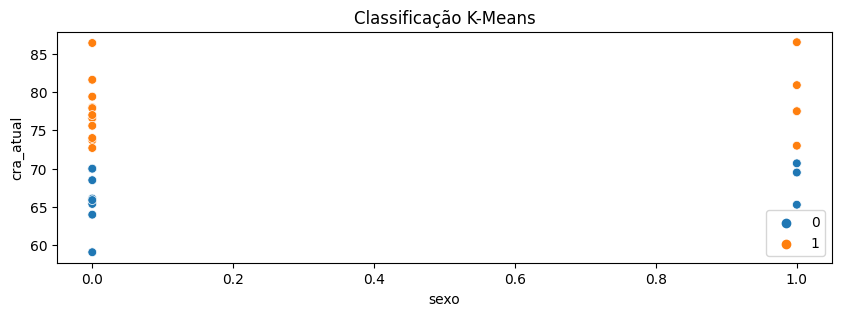

In [ ]:
plot_cluster(kmeans, df, "sexo","cra_atual")

In [ ]:
# Como a nota do enem estava impactando muito, vamos testar
# normalizar
from sklearn.preprocessing import MinMaxScaler
import numpy as np
df['nota_enem_norm'] = MinMaxScaler().fit_transform(np.array(df['nota_enem']).reshape(-1,1))

In [ ]:
cols = ['ano_entrada_curso','participa_minascoders','nota_enem_norm','idade']
kmeans = KMeans(n_clusters=2).fit(df[cols])
print('Silhueta:', round(metrics.silhouette_score(df[cols], kmeans.labels_), 4))

Silhueta: 0.5695


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


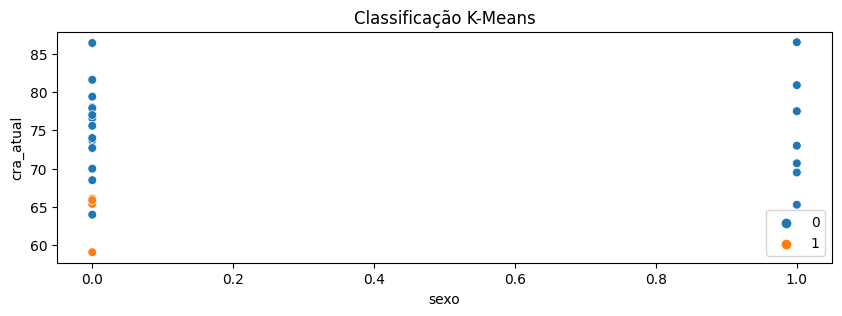

In [ ]:
plot_cluster(kmeans, df, "sexo","cra_atual")

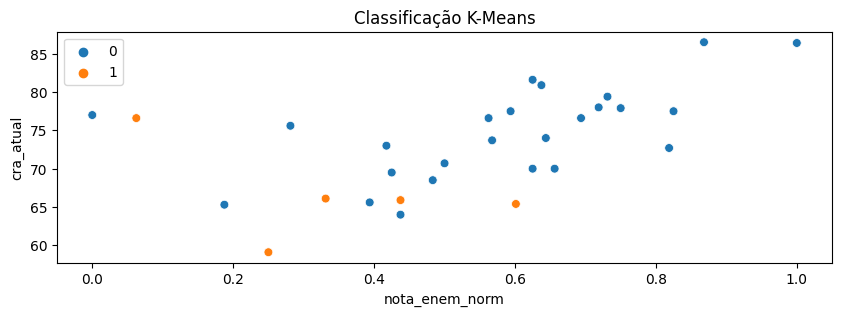

In [ ]:
plot_cluster(kmeans, df, "nota_enem_norm","cra_atual")

In [ ]:
cols = ['participa_minascoders','nota_enem_norm','idade']
kmeans = KMeans(n_clusters=2).fit(df[cols])
print('Silhueta:', round(metrics.silhouette_score(df[cols], kmeans.labels_), 4))

Silhueta: 0.6536


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
